### Newton's method

Find roots with **Newton's method** for:


1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$

2) $\:f(x) = x^3 - 7x^2 + 8x - 3 \:\:\: x_0 = 5 $

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$

In [3]:
sess = tf.Session(config=config)

In [4]:
x = tf.placeholder(tf.float64, name='x')
y = x*tf.cos(x)-x**2

In [5]:
grad_y = tf.gradients(y, x, name='grad_y')

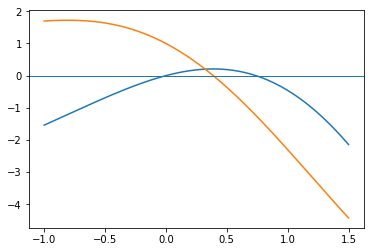

In [6]:
X = X = np.linspace(-1, 1.5, 200)
plt.figure(figsize=(6, 4))

plt.plot(X, sess.run(y, {x: X}), label='function')
plt.plot(X, sess.run(grad_y[0], {x: X}), label='derivative')
plt.axhline(y=0, linewidth=1)
plt.show()

In [7]:
tolerance = 1e-12

cur_x = 1.

while True:
    fx  = sess.run(y, {x: cur_x})
    dfx = sess.run(grad_y, {x: cur_x})[0]
    new_x = cur_x - fx/dfx
    if np.abs(new_x-cur_x) < tolerance:
        root = new_x
        break
    cur_x = new_x

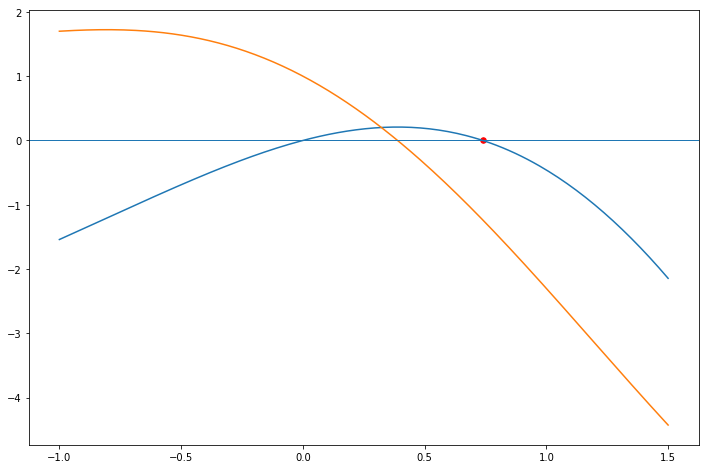

In [8]:
X = X = np.linspace(-1, 1.5, 200)
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label='function')
plt.plot(X, sess.run(grad_y[0], {x: X}), label='derivative')
plt.axhline(y=0, linewidth=1)
plt.scatter(root, 0, s = 30, c='r')
plt.show()

In [9]:
tf.reset_default_graph()

2) $\:f(x) = x^3 - 7x^2 + 8x - 3 \:\:\: x_0 = 5 $

In [10]:
sess = tf.Session(config=config)

In [11]:
x = tf.placeholder(tf.float32, name='x')
y = x**3-7*x**2+8*x-3

In [12]:
grad_y = tf.gradients(y, x, name='grad_y')

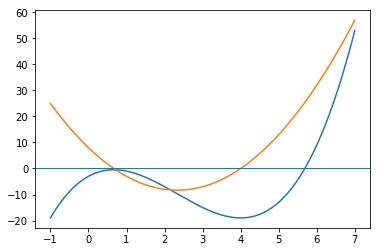

In [13]:
X = X = np.linspace(-1, 7, 200)
plt.figure(figsize=(6, 4))

plt.plot(X, sess.run(y, {x: X}), label='function')
plt.plot(X, sess.run(grad_y[0], {x: X}), label='derivative')
plt.axhline(y=0, linewidth=1)
plt.show()

In [14]:
tolerance = 1e-12

cur_x = 5.

while True:
    fx  = sess.run(y, {x: cur_x})
    dfx = sess.run(grad_y, {x: cur_x})[0]
    new_x = cur_x - fx/dfx
    if np.abs(new_x-cur_x) < tolerance:
        root = new_x
        break
    cur_x = new_x

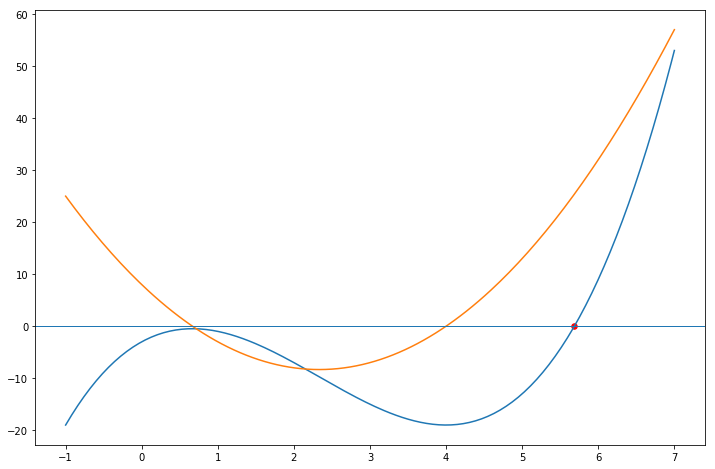

In [15]:
X = X = np.linspace(-1, 7, 200)
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label='function')
plt.plot(X, sess.run(grad_y[0], {x: X}), label='derivative')
plt.axhline(y=0, linewidth=1)
plt.scatter(root, 0, s = 30, c='r')
plt.show()

In [16]:
tf.reset_default_graph()

### Softmax

$$\text{softmax}(x)_i = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [17]:
def softmax(sess, x):
    """
    param sess: tf.Session
    param x:  np.array, n-dimentional vector
    returns: np.array n-dimentional vector
    """
    tfx   = tf.placeholder(dtype=tf.float32, shape=x.shape, name='x')
    exp_x = tf.exp(tfx, name='exp_x')
    sum_e = tf.reduce_sum(exp_x, name='sum_e')
    sftmx = exp_x/sum_e
    return sess.run(sftmx, feed_dict={tfx: x})

In [18]:
# test
import tensorflow as tf
import numpy as np

In [19]:
with tf.Session() as sess:
    if np.allclose([0.0320586, 0.08714432, 0.23688282, 0.64391426],
                   softmax(sess, np.array([1, 2, 3, 4]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!


$$\text{softmax}(X)_{ij} = \frac{\exp(X_{ij})}{\sum_j \exp(X_{ij})}$$

In [20]:
def softmax_matrix(sess, x):
    """
    Computes softmax for each row vector in matrix.
    
    param sess: tf.Session
    param x:  np.array, (n x m) matrix
    returns: np.array, (n x m) matrix
    """
    tfx   = tf.placeholder(dtype=tf.float32, shape=x.shape, name='x')
    exp_x = tf.exp(tfx, name='exp_x')
    sum_e = tf.reduce_sum(exp_x, axis=1, keepdims=True, name='sum_e')
    sftmx = exp_x/sum_e
    return sess.run(sftmx, feed_dict={tfx: x})

In [21]:
with tf.Session() as sess:
    if np.allclose([[0.10650698, 0.78698604, 0.10650698],
                    [0.09003057, 0.24472847, 0.66524096]],
                   softmax_matrix(sess, np.array([[1,3,1], [-1, 0, 1]]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!
